## Example I

In [1]:
from sklearn.datasets import make_blobs 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')
 
help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, default=100
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter
    
    n_features : int, default=2
        The number of features for each sample.
    
    centers : int or ndarray of shape (n_centers, n_features), default=None
        The number of centers to generate, or the fixed center locations.
        If n_samples 

In [2]:
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=0.9)

In [3]:
print(f'X shape = {X.shape}')
print(f'y shape = {y.shape}')

X shape = (500, 2)
y shape = (500,)


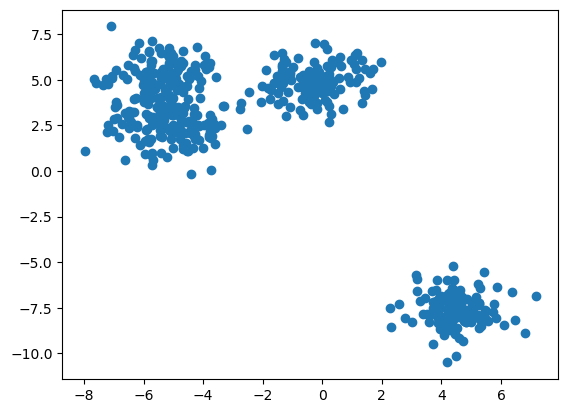

In [4]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [5]:
model = KMeans(init='random', n_clusters=4)
model.fit(X, y)
pred = model.predict(X)

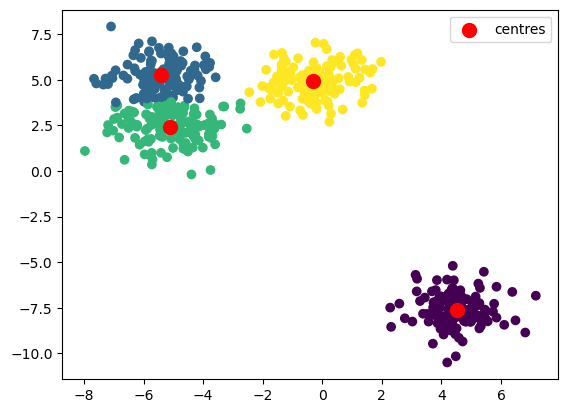

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=pred)

cluster_centers = model.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=100, label='centres');
plt.legend()
plt.show()

In [7]:
print(f"Inertia: {model.inertia_}")

Inertia: 796.1051464361026


## Example II

In [8]:
X, y = make_blobs(n_samples=500, n_features=2, centers=5, cluster_std=0.8)

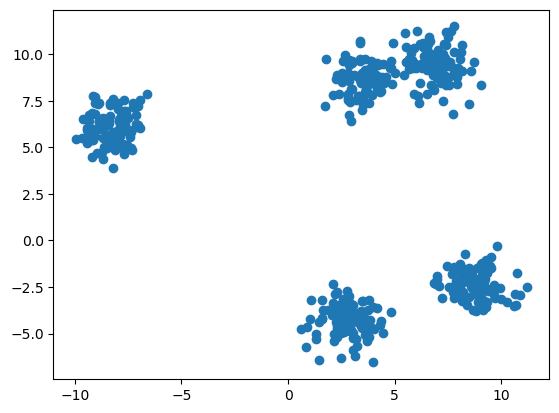

In [9]:
plt.scatter(X[:,0], X[:,1])
plt.show()

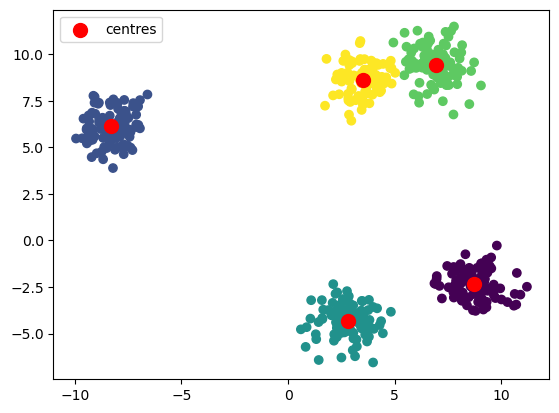

In [10]:
model_for5 = KMeans(init='random', n_clusters=5)
model_for5.fit(X, y)
pred_for5 = model_for5.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=pred_for5)
cluster_centers_for5 = model_for5.cluster_centers_
plt.scatter(cluster_centers_for5[:, 0], cluster_centers_for5[:, 1], c='red', s=100, label='centres');
plt.legend()
plt.show()

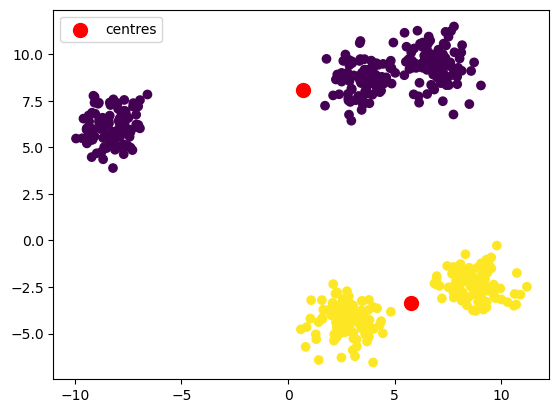

In [11]:
model_for2 = KMeans(init='random', n_clusters=2)
model_for2.fit(X, y)
pred_for2 = model_for2.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=pred_for2)
cluster_centers_for2 = model_for2.cluster_centers_
plt.scatter(cluster_centers_for2[:, 0], cluster_centers_for2[:, 1], c='red', s=100, label='centres');
plt.legend()
plt.show()

In [12]:
print(f"Inertia for 5 clusters: {model_for5.inertia_}")
print(f"Inertia for 2 clusters: {model_for2.inertia_}")

Inertia for 5 clusters: 663.906559883606
Inertia for 2 clusters: 15979.342983223802


## K-means ++

In [13]:
model = KMeans(init='k-means++', n_clusters=5)
model.fit(X,y)
pred = model.predict(X)
    
print(f"Inertia: {model.inertia_}")

Inertia: 663.906559883606


## Elbow method

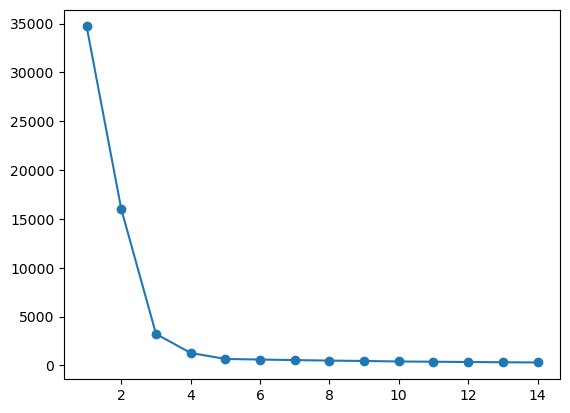

In [14]:
list_of_interias = []
list_of_clusters = [_ for _ in range(1,15)]
for cluster in list_of_clusters:
    list_of_interias.append(KMeans(init='k-means++', n_clusters=cluster).fit(X, y).inertia_)
    
plt.plot(list_of_clusters, list_of_interias, marker='o')
plt.show()

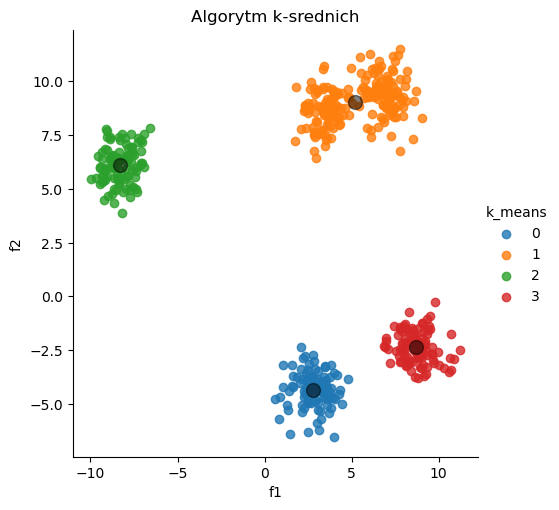

In [16]:
from sklearn.datasets import make_moons
import seaborn as sns
import pandas as pd
 
X_moon = pd.DataFrame(X, columns = ['f1','f2'])

model = KMeans(init='k-means++', n_clusters=4)
model.fit(X, y)
y_km = model.predict(X)
centers = model.cluster_centers_
 
#Plot
X_moon['k_means'] = y_km
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue = 'k_means').set(title='Algorytm k-srednich')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.show()

## Clustering II - hierarchical methods

### Dendograms

In [33]:
X, y_true = make_blobs(n_samples=300, centers=5, cluster_std=0.8, random_state=0)

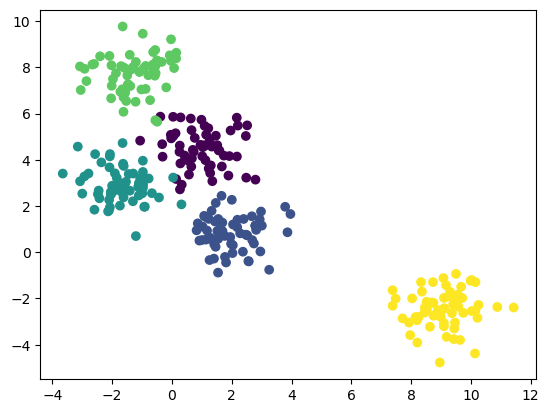

In [34]:
plt.scatter(X[:, 0], X[:, 1], c=y_true)
plt.show()

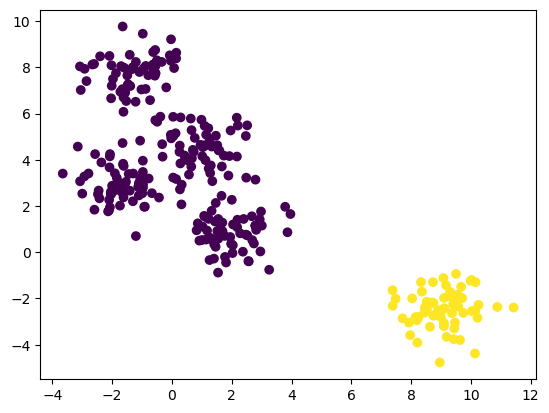

In [36]:
from sklearn.cluster import k_means

label = k_means(X, 2)[1]
plt.scatter(X[:, 0], X[:, 1], c=label)
plt.show()

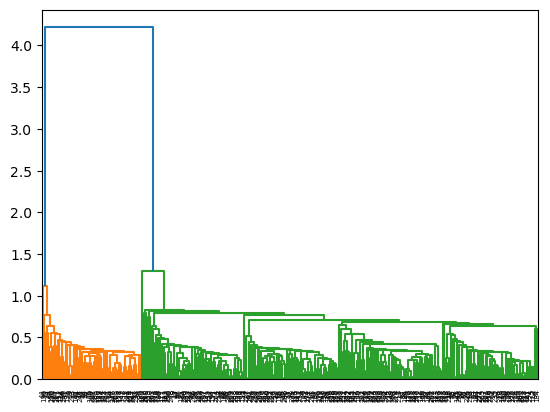

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage

lnk = linkage(X)
dnd = dendrogram(lnk)

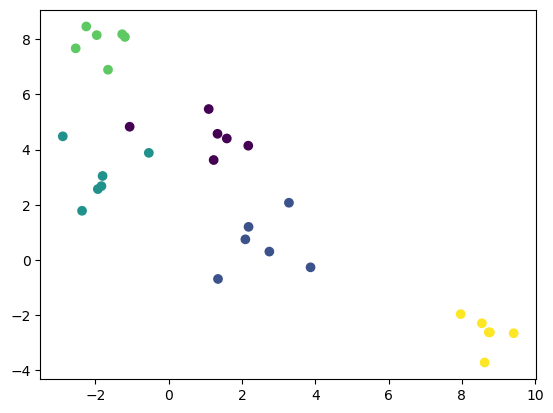

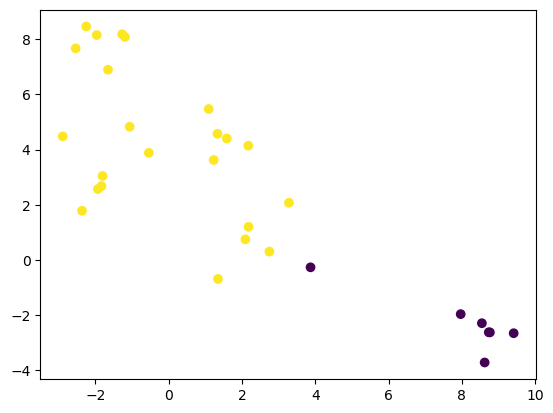

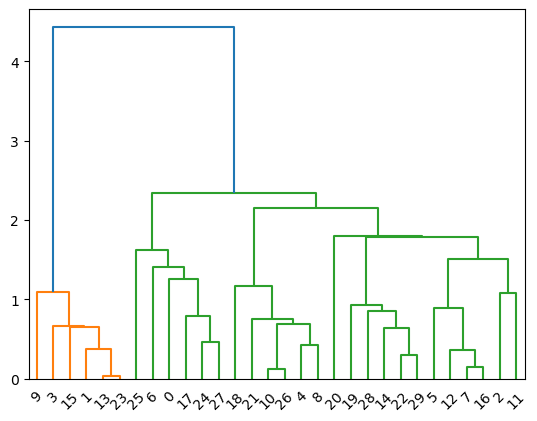

In [39]:
X, y_true = make_blobs(n_samples=30, centers=5, cluster_std=0.8, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y_true)
plt.show()
label = k_means(X, 2)[1]
plt.scatter(X[:, 0], X[:, 1], c=label)
plt.show()
lnk = linkage(X)
dnd = dendrogram(lnk)

### Agglomerative clustering

In [41]:
import pandas as pd

data = pd.read_csv("shopping_data.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [42]:
X = data[["Annual Income (k$)","Spending Score (1-100)"]]

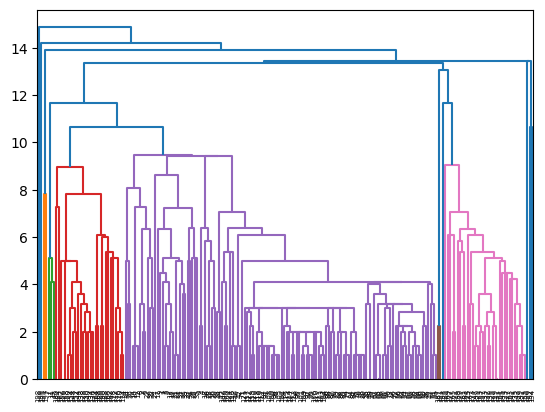

In [43]:
lnk = linkage(X, method='single')
dnd = dendrogram(lnk)

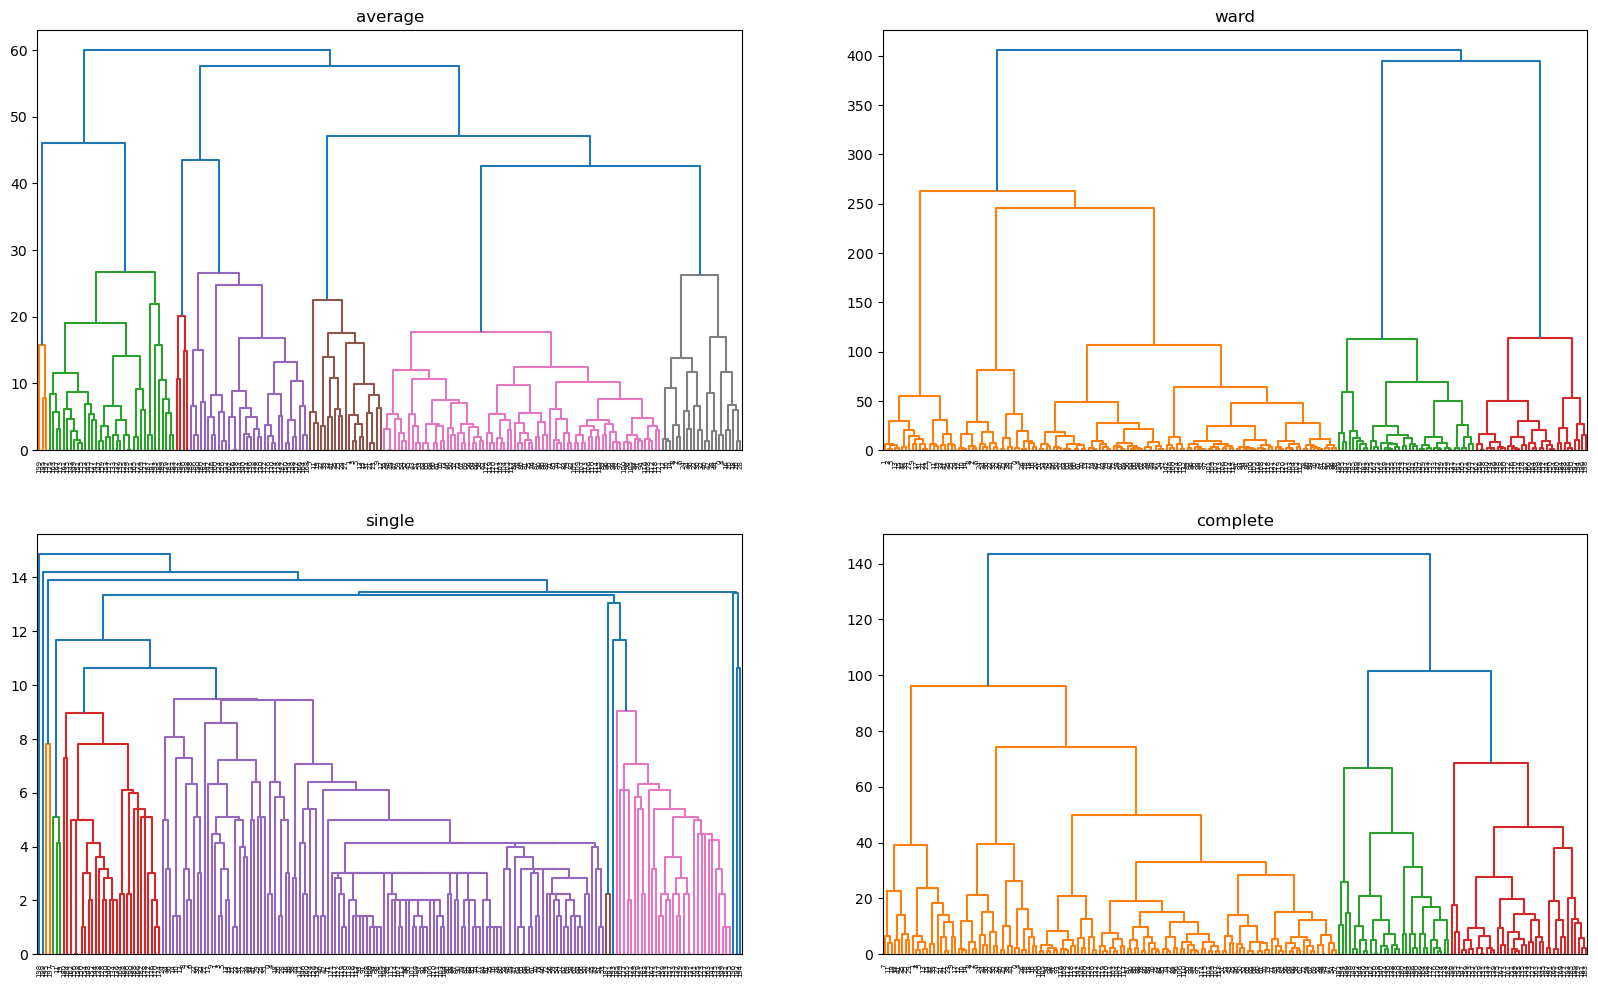

In [48]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
lnk = linkage(X, method='average')
dnd = dendrogram(lnk)
plt.title('average', size=12)

plt.subplot(2, 2, 2)
lnk = linkage(X, method='ward')
dnd = dendrogram(lnk)
plt.title('ward', size=12)

plt.subplot(2, 2, 3)
lnk = linkage(X, method='single')
dnd = dendrogram(lnk)
plt.title('single', size=12)

plt.subplot(2, 2, 4)
lnk = linkage(X, method='complete')
dnd = dendrogram(lnk)
plt.title('complete', size=12)

plt.show()

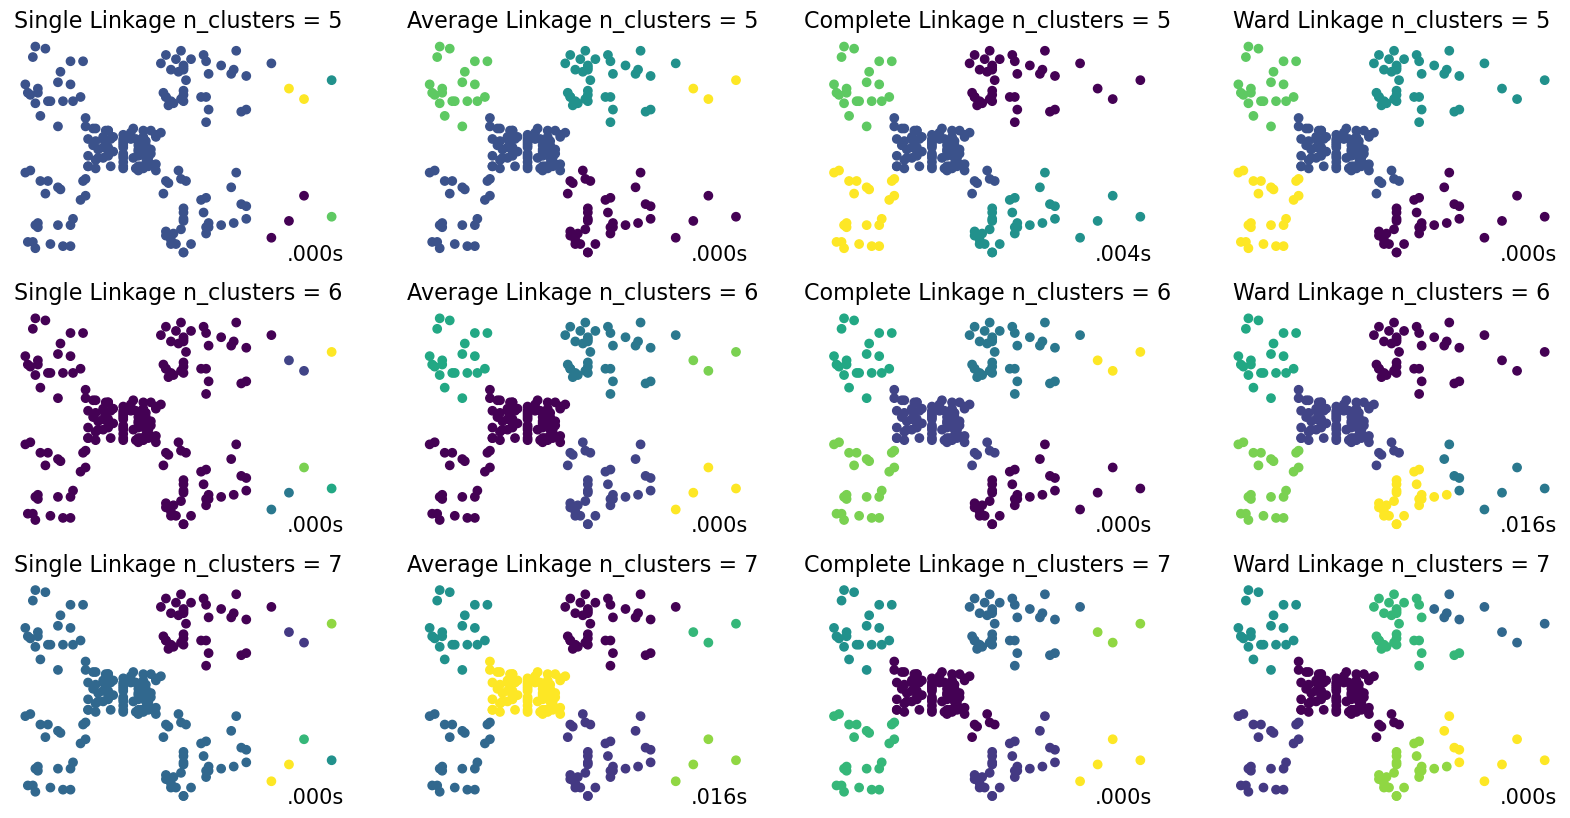

In [49]:
from sklearn.cluster import AgglomerativeClustering
import time
import numpy as np

names = (('Single Linkage', "single"), ('Average Linkage', "average"),
                         ('Complete Linkage', "complete"), ('Ward Linkage', "ward"))

X = np.array(X)
plt.figure(figsize=(20, 10))
num_of_plot = 1

for n_clusters in range(5, 8):
    for name, linkage in names:
        algorithm = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()

        plt.subplot(3, len(names), num_of_plot)
        plt.title(name + " n_clusters = " + str(n_clusters), size=16)
        plt.scatter(X[:, 0], X[:, 1], c=algorithm.labels_)
        plt.text(.99, .01, ('%.3fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plt.axis('off')
        num_of_plot += 1

### Selecting the number of clusters with silhouette analysis on KMeans clustering

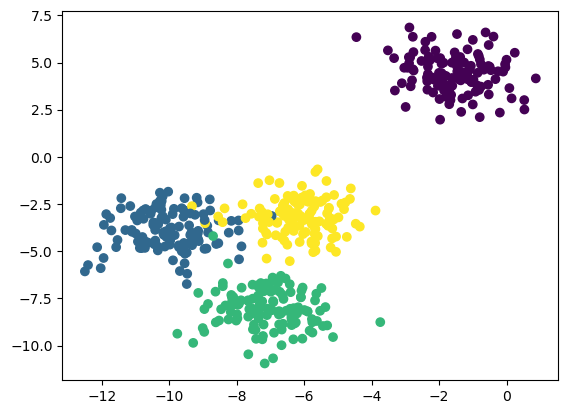

In [51]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1) 
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

For n_clusters = 2 the average silhouette_score is: 0.7049787496083262
For n_clusters = 3 the average silhouette_score is: 0.5882004012129721
For n_clusters = 4 the average silhouette_score is: 0.6505186632729437
For n_clusters = 5 the average silhouette_score is: 0.5745566973301872


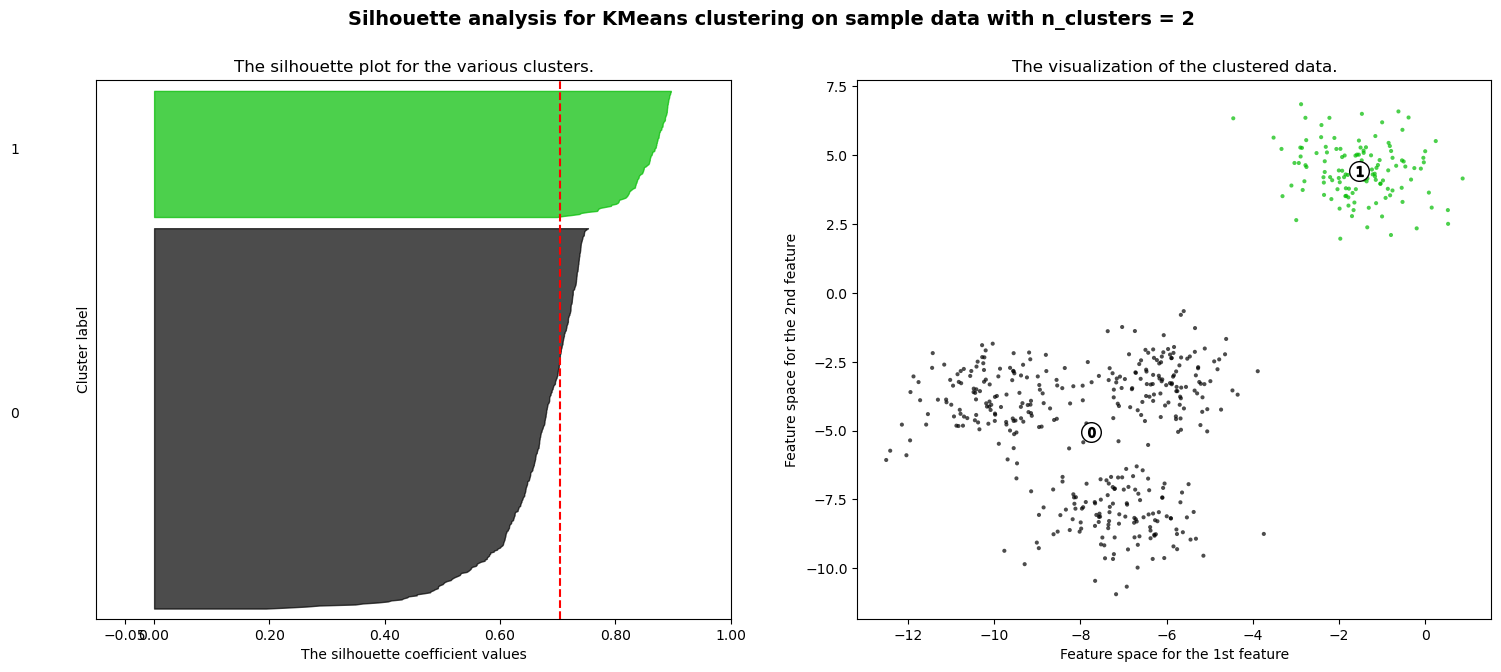

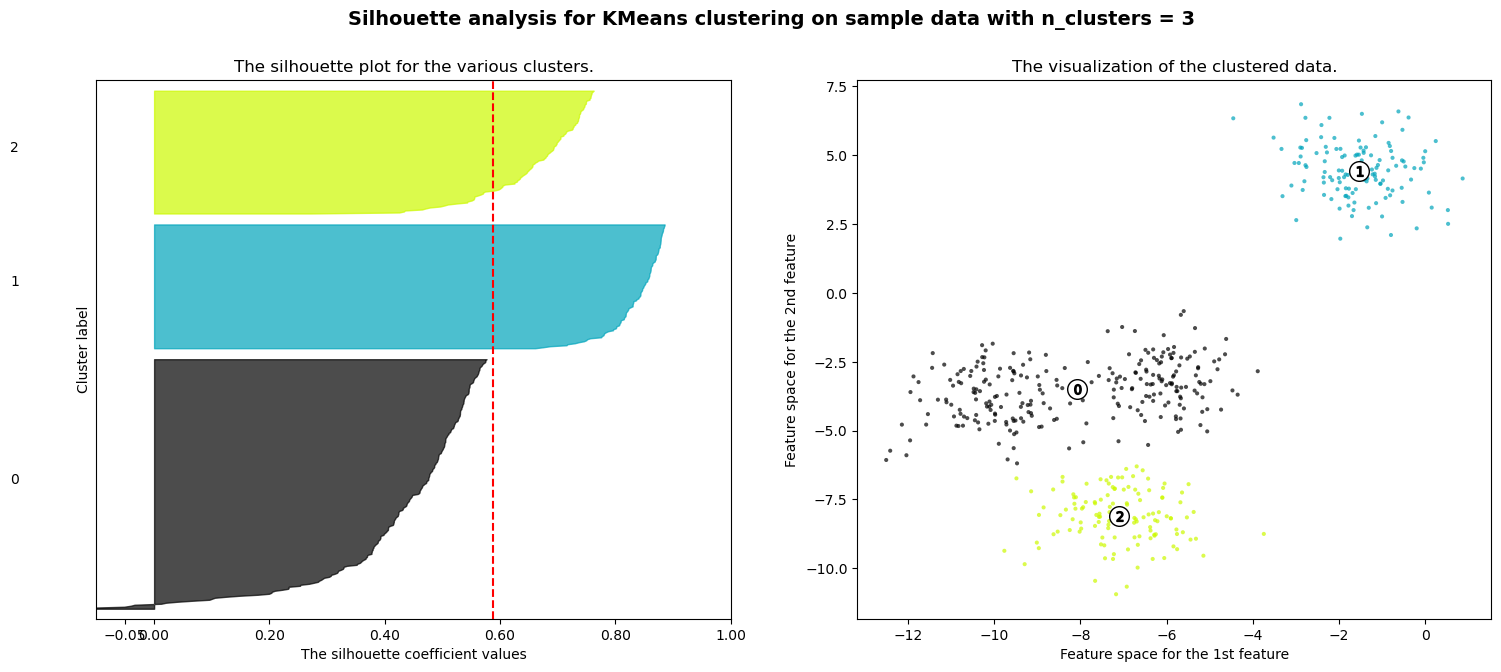

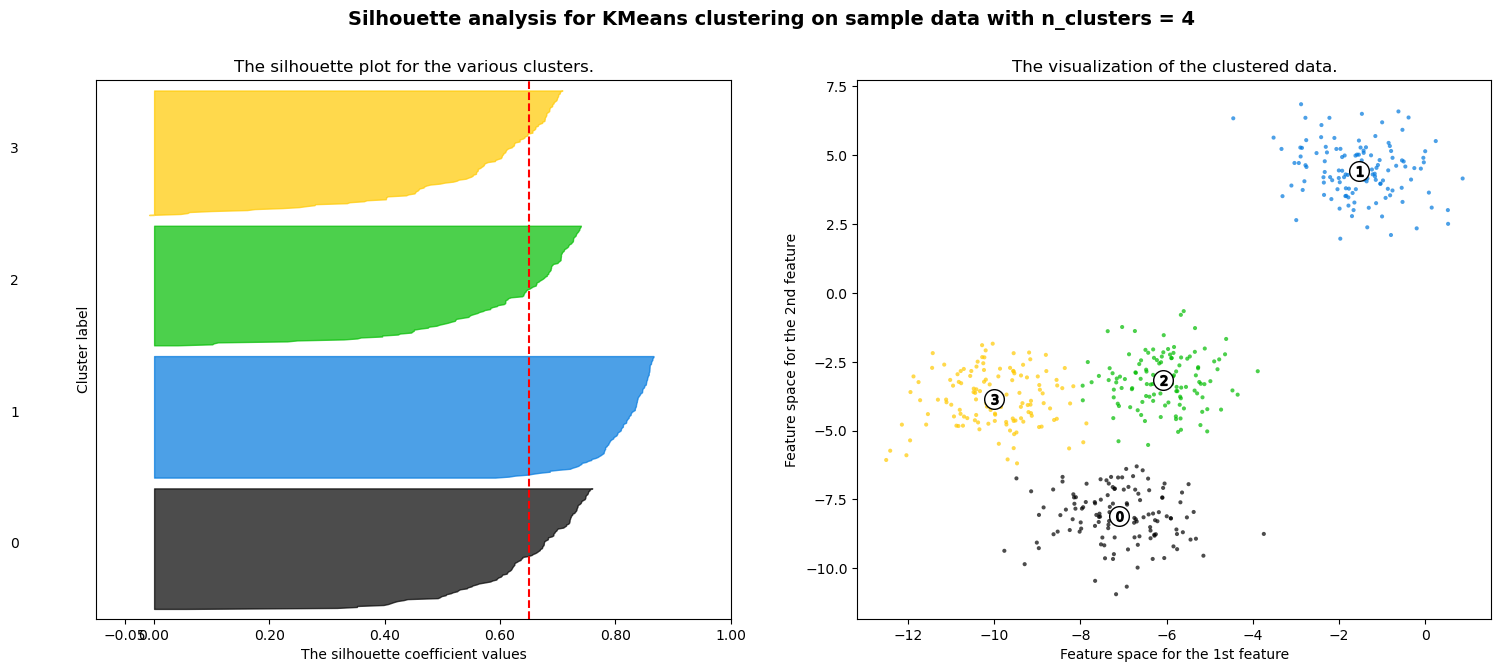

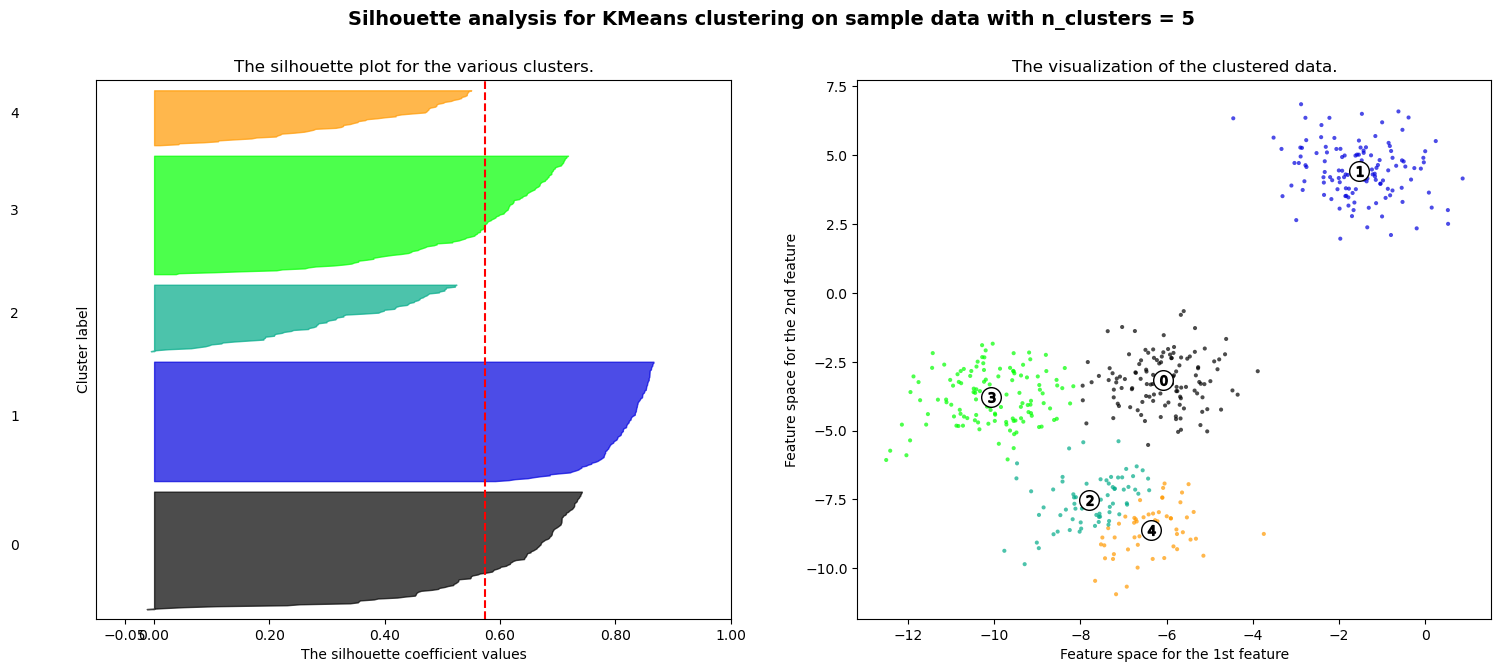

In [56]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters} the average silhouette_score is: {silhouette_avg}")

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        i_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        i_cluster_silhouette_values.sort()

        size_cluster_i = i_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, i_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.25, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.05, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=35, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## DBSCAN - density based clusterring

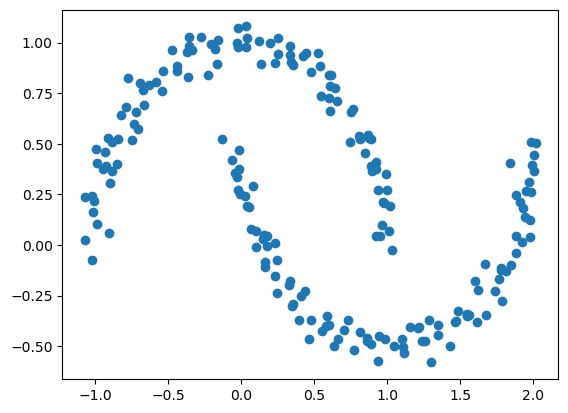

In [57]:
from sklearn.datasets import make_blobs, make_moons, make_circles
x, y = make_moons(n_samples=200, noise=.05, random_state=0)
plt.scatter(x[:,0],x[:,1])
plt.show()

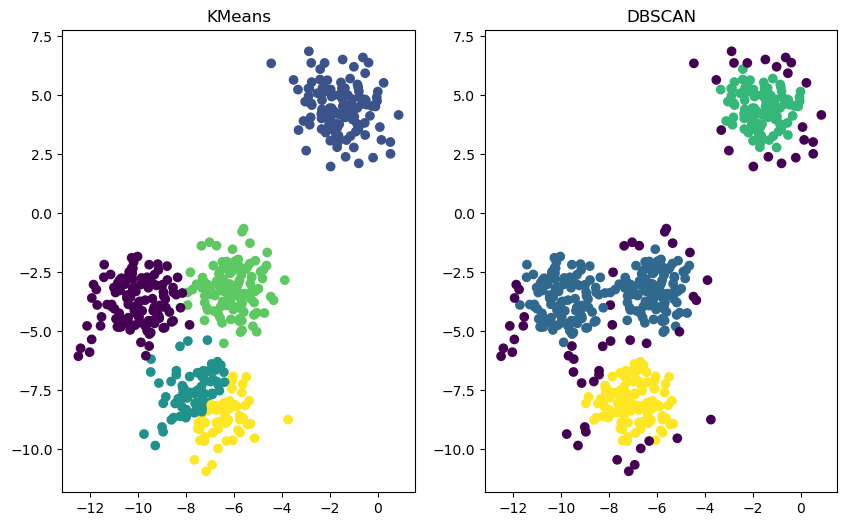

In [61]:
from sklearn.cluster import DBSCAN

plt.figure(figsize=(10, 6))

y_pred_km = KMeans(n_clusters=5).fit_predict(X, y)
y_pred_db = DBSCAN().fit_predict(X, y)

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_km)
plt.title("KMeans")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_db)
plt.title("DBSCAN")
plt.show()